In [62]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

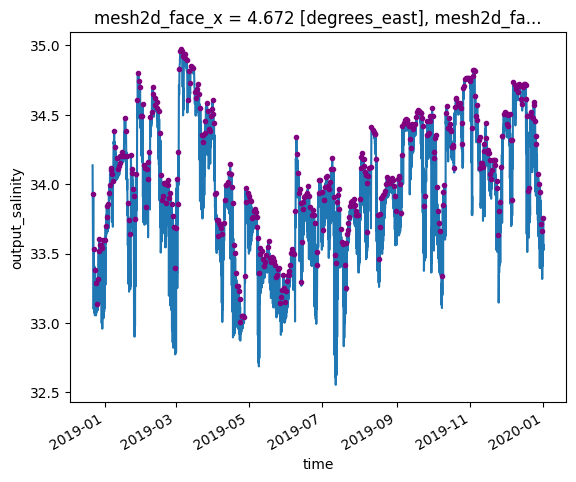

In [74]:

ds = xr.open_dataset("../Example_0108_05.nc")

sal1d = ds.salinity.isel(mesh2d_nFaces=5, mesh2d_nLayers=5)

salOut1d = ds.output_salinity.isel(mesh2d_nFaces=5, mesh2d_nLayers=5)

# print(salOut1d.values)
sal1d.plot()
salOut1d.where(salOut1d != -999).plot.line(color="purple", marker=".")

In [39]:
import datetime

In [73]:
time = ds.salinity.time
timestep = (time[-1] - time[0]) /len(time)
print(timestep.values)
width_time = np.timedelta64(12, 'h')
print(width_time)
print(width_time/timestep)
# print(time)

3599600044439 nanoseconds
12 hours
<xarray.DataArray 'time' ()>
array(12.00133333)
